In [1]:
import pandas as pd
import numpy as np
import os

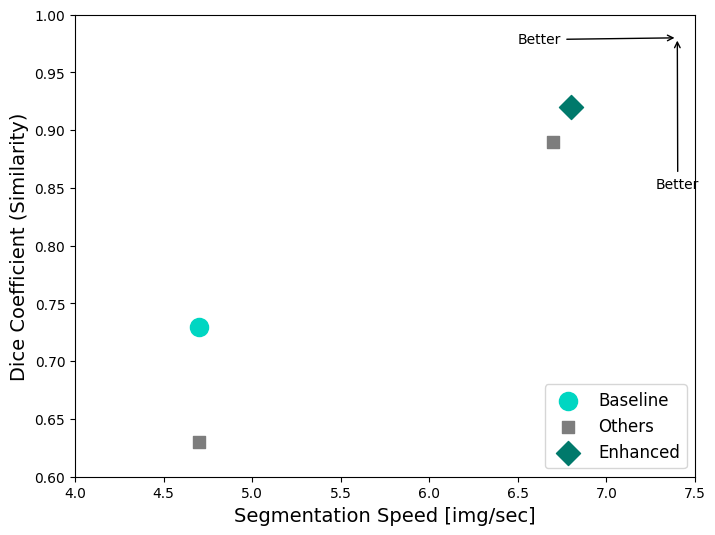

In [23]:
0.11

0.11

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [5]:
df["id"].nunique()

38496

In [284]:
df1 = df.copy()

In [285]:
df1[['case_no','day','slice','slice_no']] = df1['id'].str.split('_', expand=True)
#df1['case_no'] = df1['case_no'].apply(lambda x : x[4:])
#df1['day'] = df1['day'].apply(lambda x : x[3:])
df1 = df1.drop('slice', axis=1)

In [286]:
df1['path'] = df1.apply(lambda row : 
                        'images/train/'
                        + row['case_no']
                        + '/'
                        + row['case_no']
                        + '_'
                        + row['day']
                        + '/scans/', axis=1)

In [287]:
def read_file_name(row):
    # List all files in the folder
    files = os.listdir(row['path'])
    
    if files:
        # Select the file name of the first PNG file
        first_png_file = files[0]
        parts = first_png_file.split("_")
        width = int(parts[2])
        height = int(parts[3])
        width_sp_mm = float(parts[4])
        height_sp_mm = float(parts[5].split(".")[0] + '.' + parts[5].split(".")[1])
        extension = parts[5].split(".")[2]
        file_name = 'slice_' + row['slice_no'] + '_' + parts[2] + '_' + parts[3] + '_' + parts[4] + '_' + parts[5]
        return [file_name, width, height, width_sp_mm, height_sp_mm, extension]

df1[['file_name','width','height','width_sp_mm','height_sp_mm','extension']] = df1.apply(read_file_name, axis=1, result_type='expand')

In [288]:
class_dic = {'large_bowel': 1, 'small_bowel': 2, 'stomach': 3}
df1['class'] = df1['class'].map(class_dic)

In [289]:
df1

,id,class,segmentation,case_no,day,slice_no,path,file_name,width,height,width_sp_mm,height_sp_mm,extension
0,case123_day20_slice_0001,1,NaN,case123,day20,0001,images/train/case123/case123_day20/scans/,slice_0001_266_266_1.50_1.50.png,266,266,1.5,1.5,png
1,case123_day20_slice_0001,2,NaN,case123,day20,0001,images/train/case123/case123_day20/scans/,slice_0001_266_266_1.50_1.50.png,266,266,1.5,1.5,png
2,case123_day20_slice_0001,3,NaN,case123,day20,0001,images/train/case123/case123_day20/scans/,slice_0001_266_266_1.50_1.50.png,266,266,1.5,1.5,png
3,case123_day20_slice_0002,1,NaN,case123,day20,0002,images/train/case123/case123_day20/scans/,slice_0002_266_266_1.50_1.50.png,266,266,1.5,1.5,png
4,case123_day20_slice_0002,2,NaN,case123,day20,0002,images/train/case123/case123_day20/scans/,slice_0002_266_266_1.50_1.50.png,266,266,1.5,1.5,png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,case30_day0_slice_0143,2,NaN,case30,day0,0143,images/train/case30/case30_day0/scans/,slice_0143_266_266_1.50_1.50.png,266,266,1.5,1.5,png
115484,case30_day0_slice_0143,3,NaN,case30,day0,0143,images/train/case30/case30_day0/scans/,slice_0143_266_266_1.50_1.50.png,266,266,1.5,1.5,png
115485,case30_day0_slice_0144,1,NaN,case30,day0,0144,images/train/case30/case30_day0/scans/,slice_0144_266_266_1.50_1.50.png,266,266,1.5,1.5,png
115486,case30_day0_slice_0144,2,NaN,case30,day0,0144,images/train/case30/case30_day0/scans/,slice_0144_266_266_1.50_1.50.png,266,266,1.5,1.5,png


In [290]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115488 entries, 0 to 115487
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            115488 non-null  object 
 1   class         115488 non-null  int64  
 2   segmentation  33913 non-null   object 
 3   case_no       115488 non-null  object 
 4   day           115488 non-null  object 
 5   slice_no      115488 non-null  object 
 6   path          115488 non-null  object 
 7   file_name     115488 non-null  object 
 8   width         115488 non-null  int64  
 9   height        115488 non-null  int64  
 10  width_sp_mm   115488 non-null  float64
 11  height_sp_mm  115488 non-null  float64
 12  extension     115488 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 11.5+ MB


In [299]:
df1['id'] = df1['id'].astype('string')
df1['case_no'] = df1['case_no'].astype('string')
df1['day'] = df1['day'].astype('string')
df1['slice_no'] = df1['slice_no'].astype('string')
df1['path'] = df1['path'].astype('string')
df1['file_name'] = df1['file_name'].astype('string')
df1['extension'] = df1['extension'].astype('string')
df1

,id,class,segmentation,case_no,day,slice_no,path,file_name,width,height,width_sp_mm,height_sp_mm,extension
0,case123_day20_slice_0001,1,NaN,case123,day20,0001,images/train/case123/case123_day20/scans/,slice_0001_266_266_1.50_1.50.png,266,266,1.5,1.5,png
1,case123_day20_slice_0001,2,NaN,case123,day20,0001,images/train/case123/case123_day20/scans/,slice_0001_266_266_1.50_1.50.png,266,266,1.5,1.5,png
2,case123_day20_slice_0001,3,NaN,case123,day20,0001,images/train/case123/case123_day20/scans/,slice_0001_266_266_1.50_1.50.png,266,266,1.5,1.5,png
3,case123_day20_slice_0002,1,NaN,case123,day20,0002,images/train/case123/case123_day20/scans/,slice_0002_266_266_1.50_1.50.png,266,266,1.5,1.5,png
4,case123_day20_slice_0002,2,NaN,case123,day20,0002,images/train/case123/case123_day20/scans/,slice_0002_266_266_1.50_1.50.png,266,266,1.5,1.5,png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,case30_day0_slice_0143,2,NaN,case30,day0,0143,images/train/case30/case30_day0/scans/,slice_0143_266_266_1.50_1.50.png,266,266,1.5,1.5,png
115484,case30_day0_slice_0143,3,NaN,case30,day0,0143,images/train/case30/case30_day0/scans/,slice_0143_266_266_1.50_1.50.png,266,266,1.5,1.5,png
115485,case30_day0_slice_0144,1,NaN,case30,day0,0144,images/train/case30/case30_day0/scans/,slice_0144_266_266_1.50_1.50.png,266,266,1.5,1.5,png
115486,case30_day0_slice_0144,2,NaN,case30,day0,0144,images/train/case30/case30_day0/scans/,slice_0144_266_266_1.50_1.50.png,266,266,1.5,1.5,png


In [301]:
#Determine if the images have the same size. There is a total of image resolutions
print(f"Widths : {df1['width'].unique()}")
print(f"Heights : {df1['height'].unique()}")

print(f"Widths (mm) : {df1['width_sp_mm'].unique()} ")
print(f"Heights (mm) : {df1['height_sp_mm'].unique()} ")

Widths : [266 360 234 276]
Heights : [266 310 234 276]
Widths (mm) : [1.5  1.63] 
Heights (mm) : [1.5  1.63] 


In [304]:
#Number of image extensions
print(f"File formats : {df1['extension'].unique()[0:]}")

File formats : <StringArray>
['png']
Length: 1, dtype: string


In [298]:
#df1.to_csv('data/train_eda.csv')

In [50]:
test = df1.iloc[48133,2]
test

'15077 1 15341 10 15606 12 15871 15 16136 17 16401 19 16667 21 16932 24 17171 9 17198 33 17435 14 17464 35 17700 16 17730 37 17966 17 17996 38 18231 19 18262 39 18497 19 18529 39 18763 19 18795 40 19029 19 19062 39 19295 19 19329 38 19562 18 19599 35 19828 18 19867 33 20095 16 20135 31 20362 14 20402 30 20628 13 20669 29 20894 12 20936 27 21161 8 21203 26 21469 25 21736 23 22002 22 22269 21 22535 21 22801 20 22990 4 23067 21 23254 7 23333 21 23519 9 23599 21 23785 9 23865 21 24050 10 24131 21 24315 11 24396 22 24580 12 24661 22 24845 12 24926 23 25111 12 25190 24 25376 12 25454 25 25641 13 25717 27 25907 13 25979 30 26173 13 26241 33 26439 13 26505 34 26704 13 26769 35 26970 12 27033 36 27236 12 27297 37 27502 11 27560 39 27768 10 27824 40 28035 9 28087 41 28304 5 28351 40 28616 40 28881 39 29146 37 29412 22 29678 21 29944 19 30211 16 30477 14 30744 13 31012 10 31281 6'

In [189]:
W = 360
H = 310
def pixel_1d_2_2d(value, H, W):
    if value >= W*H:
        return -1
    else:
        column = value // H
        row = value % H
        return row, column

#myvalue = W*H - 1
#pixel_1d_2_2d(309, H, W)

(309, 0)

In [196]:
#num_ = 3000
#
#p = ([pixel_1d_2_2d(i + num_, W, H) for i in range(17)])
#[i for i in range(1)]

In [191]:
df_test = df1.iloc[[3240,3241,3242]]
#df_test = df1.iloc[[3297, 3298, 3299]]
df_test

,id,class,segmentation,path,file_name,extension
3240,case133_day25_slice_0073,1,25056 1 25412 10 25770 14 26122 24 26478 30 26...,images/train/case133/case133_day25/scans/,slice_0073_266_266_1.50_1.50,.png
3241,case133_day25_slice_0073,2,32994 4 33351 9 33710 11 34069 13 34428 14 347...,images/train/case133/case133_day25/scans/,slice_0073_266_266_1.50_1.50,.png
3242,case133_day25_slice_0073,3,33666 6 34022 12 34378 17 34736 19 35094 21 35...,images/train/case133/case133_day25/scans/,slice_0073_266_266_1.50_1.50,.png


In [147]:
pixel_1d_2_2d(25412, W, H)

(95, 142)

1 [25056     1 25412    10 25770    14 26122    24 26478    30 26834    36
 27193    37 27552    39 27911    40 28270    41 28630    41 28990    40
 29350    39 29710    38 30071    37 30431    37 30792    35 31153    34
 31513    33 31874    30 32235    28 32597     7 32609    12 32959     2
 32971     9 33334     3 38759     7 39117    10 39473    14 39830    17
 40189    19 40549    19 40908    20 41267    22 41627    22 41987    22
 42346    23 42706    24 43066    24 43427    23 43787    23 44148    23
 44509    22 44870    21 45231    20 45593    18 45954    17 46315    16
 46677    14 47038    12 47401     9 47766     2]
[[215  69]]
[[211  70]
 [212  70]
 [213  70]
 [214  70]
 [215  70]
 [216  70]
 [217  70]
 [218  70]
 [219  70]
 [220  70]]
[[209  71]
 [210  71]
 [211  71]
 [212  71]
 [213  71]
 [214  71]
 [215  71]
 [216  71]
 [217  71]
 [218  71]
 [219  71]
 [220  71]
 [221  71]
 [222  71]]
[[201  72]
 [202  72]
 [203  72]
 [204  72]
 [205  72]
 [206  72]
 [207  72]
 [208  72

3240    None
3241    None
3242    None
dtype: object

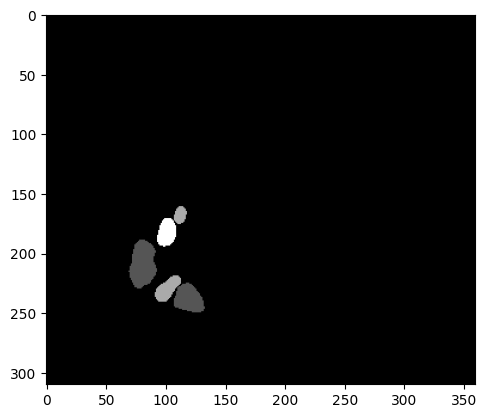

In [195]:
#3241, 3242, 3243
import matplotlib.pyplot as plt

matrix = np.zeros((W, H))

def run_length_2_list(value, segments, path, name, ext):
    global matrix
    if value == 1:
        matrix = np.zeros((W,H))
    if pd.notna(segments):
        run_length_num = np.array([eval(i) for i in segments.split(' ')])
        print(value, run_length_num)
        for i in range(0, len(run_length_num), 2):
            coords = ([pixel_1d_2_2d(x + run_length_num[i] - 1, H, W) for x in range(0, run_length_num[i+1])])
            # Convert the coordinates into numpy array
            coords = np.array(coords)
            print(coords)
            # Extract the x and y coordinates separately
            x_coords = coords[:, 0]
            y_coords = coords[:, 1]
            matrix[x_coords, y_coords] = value
    if value == 3:
        #plt.figure(figsize=(10, 10))
        plt.imshow(matrix, cmap='gray')

df_test.apply(lambda row : run_length_2_list(row['class'], row['segmentation'], row['path'], row['file_name'], row['extension']), axis=1)

In [36]:
np.asarray(df1.iloc[48133,2]).shape

()

In [37]:
#df1.to_csv('data/train_proc.csv')